# The Sparks Foundation : Data science and Business Analytics Tasks

<img src="https://internship.thesparksfoundation.info/assests/img/logo.png"  width="300" height="300">

# Task 2 : Prediction using unsupervised ML

* Target from the given dataset , predict the optimum number of clusters and represent it visually.

# Author : Adham Saber

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Reading the Data

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Drop ID and Target (this is unsupervised problem (clustering))

In [3]:
df.drop(['Id' , 'Species'] , axis = 1 , inplace = True)

## Check data info for any missing records and show data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

* No missing records

In [6]:
# check for duplicates
df.duplicated().sum()

3

In [7]:
# 3 duplictaed values drop them
df.drop_duplicates(inplace = True , ignore_index = True)

<AxesSubplot: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

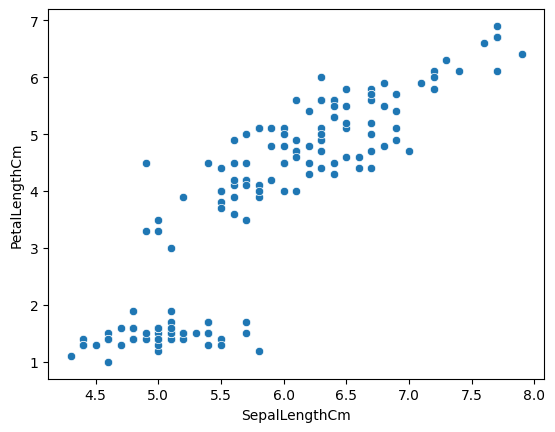

In [8]:
sns.scatterplot(data = df , x = df['SepalLengthCm'] , y = df['PetalLengthCm'])

## Show correlation between features

<AxesSubplot: >

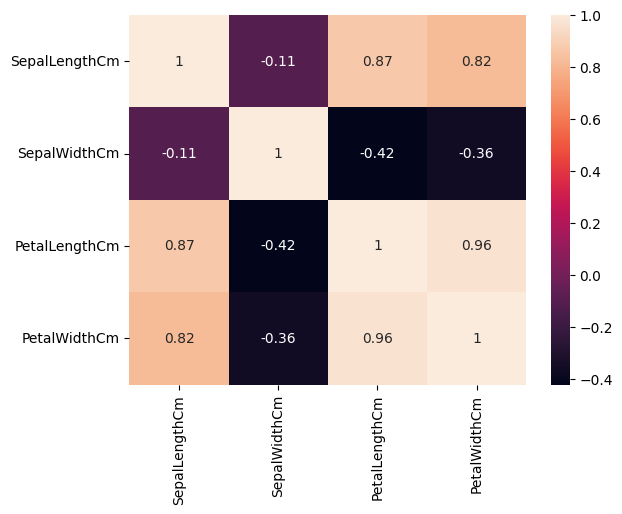

In [9]:
sns.heatmap(df.corr() , annot = True)

## Try K-means with different number of clusters

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
    kmeans.fit(df.values)
    wcss.append(kmeans.inertia_)

<AxesSubplot: >

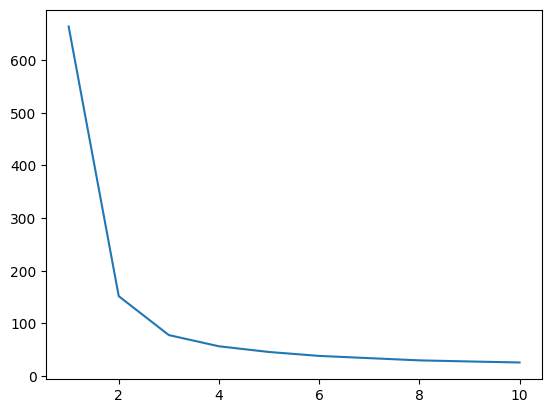

In [11]:
sns.lineplot(x = range(1,11) , y = wcss)

## Apply K-means with 3 clusters

In [12]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)

In [13]:
y_kmeans = kmeans.fit_predict(df.values)

## Show our cluster

<AxesSubplot: >

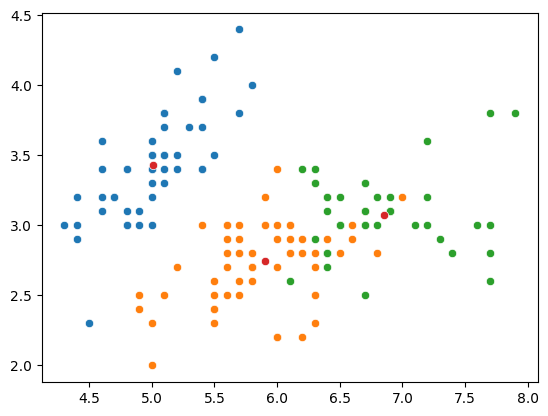

In [14]:
sns.scatterplot(x = df.values[y_kmeans == 0, 0] , y = df.values[y_kmeans == 0, 1],markers = '-')
sns.scatterplot(x = df.values[y_kmeans == 1, 0] , y = df.values[y_kmeans == 1, 1])
sns.scatterplot(x = df.values[y_kmeans == 2, 0] , y = df.values[y_kmeans == 2, 1])
sns.scatterplot(x = kmeans.cluster_centers_[:, 0] , y = kmeans.cluster_centers_[:,1])